In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('stuff.csv')

In [4]:
safe = data.copy()

In [5]:
data.shape

(1332, 13)

In [6]:
data.isna().sum()

car               0
province          0
city              0
price             0
km_count          0
color             0
status            0
inside_color      0
chassis_type      0
gearbox           0
cylinder_count    0
fuel_type         0
phone_num         0
dtype: int64

In [7]:
data.province.value_counts()

تهران                  710
اصفهان                  86
البرز                   85
خراسان رضوی             73
مازندران                55
فارس                    50
گیلان                   38
آذربایجان شرقی          34
خوزستان                 29
کرمان                   20
قزوین                   18
مرکزی                   15
گلستان                  14
کرمانشاه                14
همدان                   13
لرستان                  10
یزد                      9
اردبیل                   8
قم                       8
آذربایجان غربی           7
سمنان                    7
هرمزگان                  7
زنجان                    5
سیستان و بلوچستان        4
خراسان شمالی             4
خراسان جنوبی             3
بوشهر                    2
کهگیلویه و بویراحمد      2
کردستان                  1
ایلام                    1
Name: province, dtype: int64

In [8]:
data_no_duplicates = data.drop_duplicates()

In [9]:
data_no_duplicates.shape

(1321, 13)

In [10]:
data.price.value_counts()

توافقی                158
۲۵۰,۰۰۰,۰۰۰تومان       18
۲۳۰,۰۰۰,۰۰۰تومان       18
۳۰۰,۰۰۰,۰۰۰تومان       17
۲۷۰,۰۰۰,۰۰۰تومان       16
                     ... 
۶۷۰,۰۰۰,۰۰۰تومان        1
۳۰۶,۰۰۰,۰۰۰تومان        1
۴۲۲,۰۰۰,۰۰۰تومان        1
۲,۴۵۰,۰۰۰,۰۰۰تومان      1
۳۱۸,۰۰۰,۰۰۰تومان        1
Name: price, Length: 342, dtype: int64

In [11]:
from unidecode import unidecode

In [12]:
def price_fix(price):
    if price == 'توافقی':
        return -1
    price = price[:-5]

    price = unidecode(price)
    if price == '': # comment
        return 0    # comment
    price = int(price.replace(',', ''))
    return price

In [13]:
def km_fix(meter):

    meter = unidecode(meter)
    meter = (meter.replace(',', ''))
    if meter.isdigit():
        return int(meter)
    else:
        return 0
    

In [14]:
data['km_count'] = data.km_count.apply(km_fix)

In [15]:
price_fix(data.iloc[0].price[:-5])

103000

- what is this error

In [16]:
data['price'] = data.price.apply(price_fix)

- lets find the problem

In [17]:
data[data.price == 0]

,car,province,city,price,km_count,color,status,inside_color,chassis_type,gearbox,cylinder_count,fuel_type,phone_num
290,خرید پژو 405 GLX بنزینی 1393,مازندران,ساری,0,240000,نقره ای,بدون رنگ,کرم,صندوق دار,دنده ای,4 سیلندر,بنزین,۰۹۳۷ ۷۴۰ ۵۹ ۳۷
1201,خرید هیوندای جنسیس 2014,گیلان,رشت,0,70400,سفید صدفی,بدون رنگ,زرشکی,صندوق دار,اتوماتیک,6 سیلندر,بنزین,۰۹۱۱ ۱۳۱ ۸۲ ۳۲
1301,خرید جک S3 1400,البرز,کرج,0,16000,سفید,بدون رنگ,مشکی,شاسی بلند,اتوماتیک,4 سیلندر,بنزین,۰۹۱۲ ۶۰۶ ۲۸ ۱۳


In [18]:
def price_fix(price):
    if price == 'توافقی':
        return -1
    price = price[:-5]
    if price == 'اقساطی':
        return -2
    price = unidecode(price)
    price = int(price.replace(',', ''))
    return price

# finding Outliers

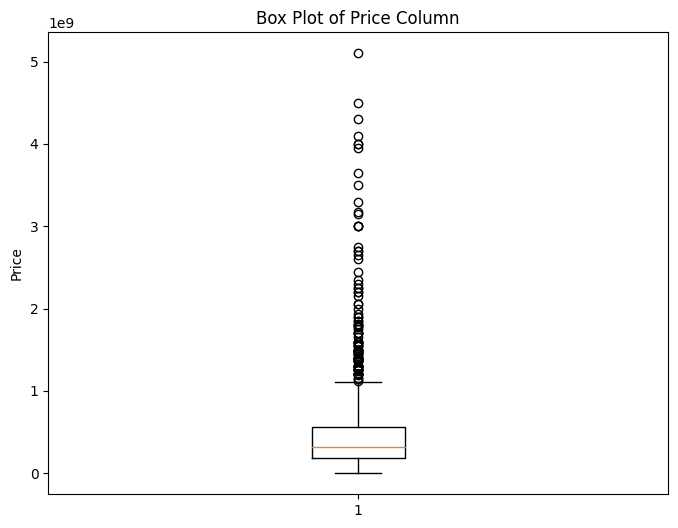

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Calculate Z-score
data['z_score'] = (data['price'] - data['price'].mean()) / data['price'].std()

# Calculate IQR
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds using IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using Z-score and IQR
outliers_zscore = data[abs(data['z_score']) > 3]
outliers_iqr = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]

# Create a box plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.boxplot(data['price'])
plt.title("Box Plot of Price Column")
plt.ylabel("Price")
plt.show()


In [20]:
outliers_zscore.price.sort_values(ascending = False)

554     5100000000
557     4500000000
220     4300000000
87      4100000000
1027    4000000000
129     4000000000
16      3950000000
1213    3650000000
120     3500000000
172     3300000000
749     3170000000
91      3150000000
1263    3000000000
142     3000000000
562     3000000000
39      2750000000
218     2700000000
41      2700000000
919     2650000000
165     2600000000
464     2450000000
1292    2350000000
229     2300000000
657     2250000000
161     2250000000
555     2200000000
1146    2200000000
1006    2150000000
Name: price, dtype: int64

In [21]:
outliers_iqr.price.sort_values(ascending = False)

554     5100000000
557     4500000000
220     4300000000
87      4100000000
1027    4000000000
           ...    
1151    1200000000
551     1190000000
134     1160000000
755     1150000000
995     1120000000
Name: price, Length: 105, dtype: int64

In [22]:
# Calculate IQR
Q1 = data['price'].quantile(0.10)
Q3 = data['price'].quantile(0.90)
IQR = Q3 - Q1
# Define outlier bounds using IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]


In [23]:
outliers_iqr.price.sort_values(ascending = False)

554     5100000000
557     4500000000
220     4300000000
87      4100000000
129     4000000000
1027    4000000000
16      3950000000
1213    3650000000
120     3500000000
172     3300000000
749     3170000000
91      3150000000
562     3000000000
1263    3000000000
142     3000000000
39      2750000000
41      2700000000
218     2700000000
919     2650000000
165     2600000000
464     2450000000
Name: price, dtype: int64

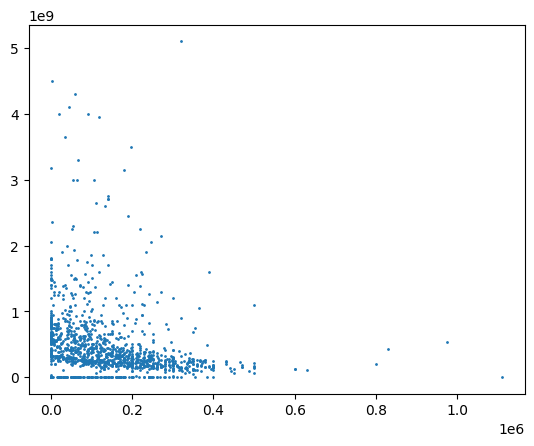

In [24]:
plt.scatter(data.km_count, data.price, s=1)

(array([272., 453., 218., 146.,  81.,  43.,  17.,  22.,  24.,  10.,  12.,
          4.,   5.,   4.,   1.,   4.,   1.,   3.,   2.,   1.,   1.,   1.,
          0.,   3.,   1.,   1.,   1.,   0.,   0.,   1.]),
 array([-1.00000000e+00,  1.69999999e+08,  3.39999999e+08,  5.09999999e+08,
         6.79999999e+08,  8.49999999e+08,  1.02000000e+09,  1.19000000e+09,
         1.36000000e+09,  1.53000000e+09,  1.70000000e+09,  1.87000000e+09,
         2.04000000e+09,  2.21000000e+09,  2.38000000e+09,  2.55000000e+09,
         2.72000000e+09,  2.89000000e+09,  3.06000000e+09,  3.23000000e+09,
         3.40000000e+09,  3.57000000e+09,  3.74000000e+09,  3.91000000e+09,
         4.08000000e+09,  4.25000000e+09,  4.42000000e+09,  4.59000000e+09,
         4.76000000e+09,  4.93000000e+09,  5.10000000e+09]),
 <BarContainer object of 30 artists>)

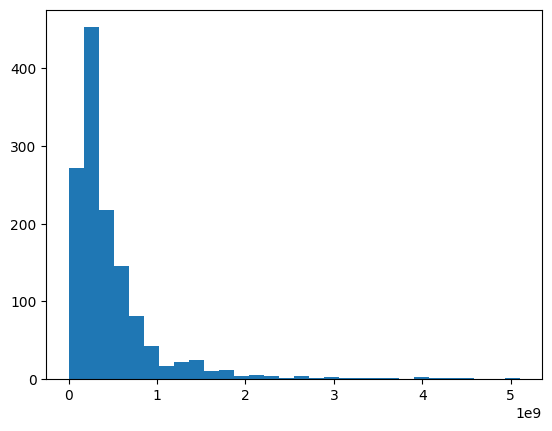

In [25]:
plt.hist(data.price, bins=30)

# Inconsistencies

In [26]:
data.fuel_type.unique()

array(['بنزین', 'دوگانه سوز', 'بنزینی', 'هایبرید', 'دیزل'], dtype=object)

In [27]:
data.loc[data.fuel_type == 'بنزینی', ['fuel_type']] = 'بنزین'

In [28]:
data.fuel_type.unique()

array(['بنزین', 'دوگانه سوز', 'هایبرید', 'دیزل'], dtype=object)

# Encoding Categorical Features

In [29]:
data = data.drop(['car', 'phone_num', 'z_score'], axis=1)

In [30]:
cat_columns = ['province', 'city', 'color', 'status',
       'inside_color', 'chassis_type', 'gearbox', 'cylinder_count',
       'fuel_type' ]

In [31]:
from sklearn.preprocessing import LabelEncoder

# Function for One-Hot Encoding
def one_hot_encode(df, columns):
    return pd.get_dummies(df, columns=columns, prefix=columns)

# Function for Label Encoding
def label_encode(df, columns):
    le = LabelEncoder()
    df_encoded = df.copy()
    for col in columns:
        df_encoded[col] = le.fit_transform(df[col])
    return df_encoded

In [32]:
one_hot_encode(data, ['province']).head(5)

,city,price,km_count,color,status,inside_color,chassis_type,gearbox,cylinder_count,fuel_type,...,province_مرکزی,province_هرمزگان,province_همدان,province_کردستان,province_کرمان,province_کرمانشاه,province_کهگیلویه و بویراحمد,province_گلستان,province_گیلان,province_یزد
0,تهران,1030000000,100000,سفید,بدون رنگ,مشکی,شاسی بلند,اتوماتیک,4 سیلندر,بنزین,...,0,0,0,0,0,0,0,0,0,0
1,تهران,240000000,240000,نقره ای,بدون رنگ,کرم,صندوق دار,دنده ای,4 سیلندر,بنزین,...,0,0,0,0,0,0,0,0,0,0
2,نوشهر,465000000,100000,سفید,بدون رنگ,مشکی,صندوق دار,دنده ای,4 سیلندر,بنزین,...,0,0,0,0,0,0,0,0,0,0
3,کرج,570000000,137000,نوک مدادی,یک لکه رنگ,کرم,هاچ بک,اتوماتیک,4 سیلندر,بنزین,...,0,0,0,0,0,0,0,0,0,0
4,تهران,500000000,40000,مشکی,بدون رنگ,مشکی,صندوق دار,دنده ای,4 سیلندر,بنزین,...,0,0,0,0,0,0,0,0,0,0


In [33]:
label_encode(data, ['province'])

,province,city,price,km_count,color,status,inside_color,chassis_type,gearbox,cylinder_count,fuel_type
0,7,تهران,1030000000,100000,سفید,بدون رنگ,مشکی,شاسی بلند,اتوماتیک,4 سیلندر,بنزین
1,7,تهران,240000000,240000,نقره ای,بدون رنگ,کرم,صندوق دار,دنده ای,4 سیلندر,بنزین
2,19,نوشهر,465000000,100000,سفید,بدون رنگ,مشکی,صندوق دار,دنده ای,4 سیلندر,بنزین
3,4,کرج,570000000,137000,نوک مدادی,یک لکه رنگ,کرم,هاچ بک,اتوماتیک,4 سیلندر,بنزین
4,7,تهران,500000000,40000,مشکی,بدون رنگ,مشکی,صندوق دار,دنده ای,4 سیلندر,بنزین
...,...,...,...,...,...,...,...,...,...,...,...
1327,7,تهران,189000000,195000,طلائی,بدون رنگ,طوسی,صندوق دار,دنده ای,4 سیلندر,بنزین
1328,7,تهران,-1,28000,آلبالویی,بدون رنگ,شتری,شاسی بلند,اتوماتیک,4 سیلندر,بنزین
1329,22,نهاوند,125000000,280000,نقره ای,تصادفی,مشکی,صندوق دار,دنده ای,4 سیلندر,دوگانه سوز
1330,7,تهران,-1,38000,نوک مدادی,بدون رنگ,مشکی,هاچ بک,دنده ای,4 سیلندر,بنزین


In [34]:
data_enc = label_encode(data, cat_columns)

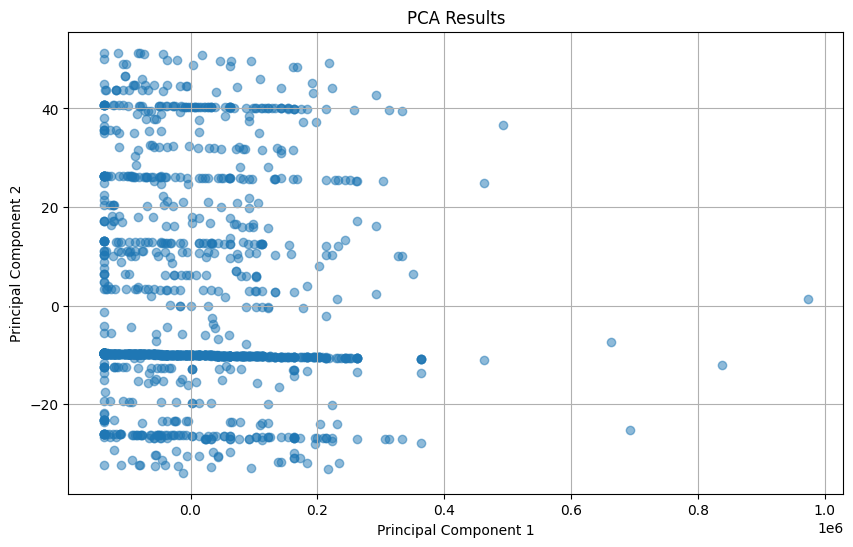

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming you have your DataFrame named 'data'
# data = pd.read_csv('your_data.csv')

# Separate features from target (if applicable)
X = data_enc.drop(columns=['price'])  # Adjust 'target_column' as needed

# Standardize features
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Apply PCA
n_components = 2  # Number of principal components to retain
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X)

# Create a DataFrame with principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components+1)])

# Concatenate with target (if applicable)
# pc_df = pd.concat([pc_df, data['target_column']], axis=1)

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.grid(True)
plt.show()


In [36]:
pc_df[pc_df['PC1']>4.5]

,PC1,PC2
1,102955.322092,-10.266634
6,196955.322040,-28.038772
8,250955.322119,-10.624666
10,91955.322174,19.828427
12,202955.322125,-10.507760
...,...,...
1321,12955.322011,-10.043892
1323,8955.322011,-10.039650
1326,89955.322062,12.494226
1327,57955.322031,-10.160029


In [37]:
data.loc[512]

province               تهران
city                   تهران
price              530000000
km_count              975000
color                   مشکی
status            دو لکه رنگ
inside_color            مشکی
chassis_type       شاسی بلند
gearbox              دنده ای
cylinder_count      4 سیلندر
fuel_type              بنزین
Name: 512, dtype: object

In [38]:
data.loc[669]

province          خراسان رضوی
city                     مشهد
price               130000000
km_count               600000
color                    سفید
status             یک لکه رنگ
inside_color             طوسی
chassis_type        صندوق دار
gearbox               دنده ای
cylinder_count       4 سیلندر
fuel_type          دوگانه سوز
Name: 669, dtype: object

In [39]:
data_enc['price']= data['price']

# Scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def apply_scaling(df, columns_to_scale, scaling_methods=('minmax', 'standard')):
    scaled_df = df.copy()
    
    if 'minmax' in scaling_methods:
        minmax_scaler = MinMaxScaler()
        scaled_df[columns_to_scale] = minmax_scaler.fit_transform(scaled_df[columns_to_scale])
    
    if 'standard' in scaling_methods:
        standard_scaler = StandardScaler()
        scaled_df[columns_to_scale] = standard_scaler.fit_transform(scaled_df[columns_to_scale])
    
    return scaled_df

In [43]:
data_enc

,province,city,price,km_count,color,status,inside_color,chassis_type,gearbox,cylinder_count,fuel_type
0,7,25,1030000000,100000,12,1,7,0,0,3,0
1,7,25,240000000,240000,23,1,10,1,1,3,0
2,19,66,465000000,100000,12,1,7,1,1,3,0
3,4,76,570000000,137000,24,8,10,3,0,3,0
4,7,25,500000000,40000,20,1,7,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
1327,7,25,189000000,195000,15,1,4,1,1,3,0
1328,7,25,-1,28000,2,1,3,0,0,3,0
1329,22,65,125000000,280000,23,2,7,1,1,3,1
1330,7,25,-1,38000,24,1,7,3,1,3,0


In [45]:
data_scaled = apply_scaling(data_enc, data_enc.columns, 'minmax')

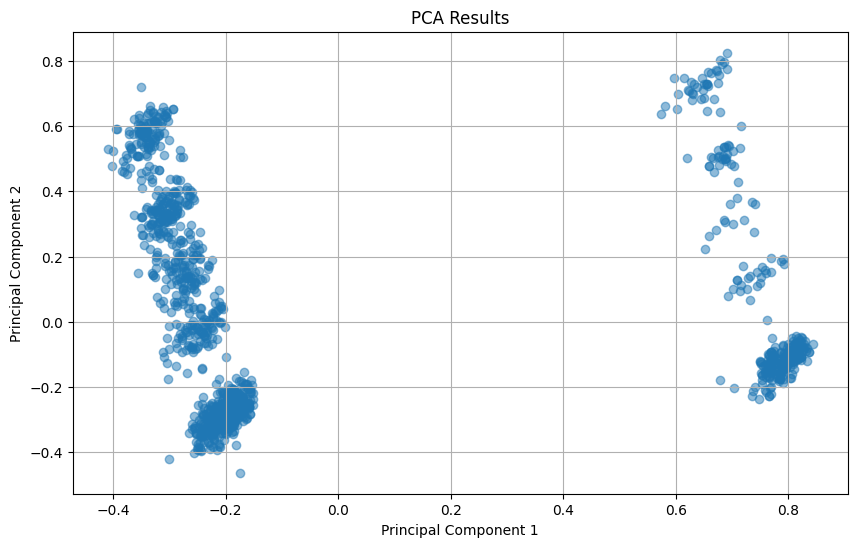

In [46]:
X = data_scaled.drop(columns=['price'])  # Adjust 'target_column' as needed

# Standardize features
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Apply PCA
n_components = 2  # Number of principal components to retain
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X)

# Create a DataFrame with principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components+1)])

# Concatenate with target (if applicable)
# pc_df = pd.concat([pc_df, data['target_column']], axis=1)

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.grid(True)
plt.show()


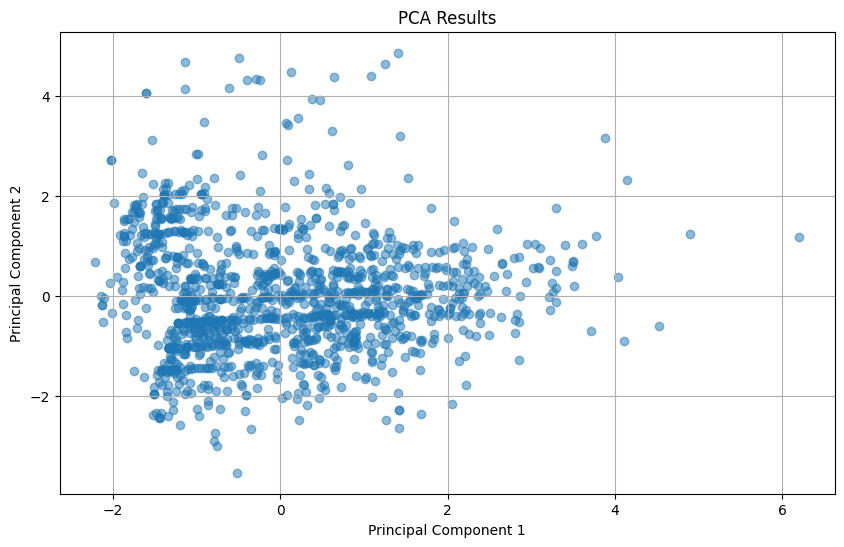

In [48]:
data_scaled = apply_scaling(data_enc, data_enc.columns, 'standard')
X = data_scaled.drop(columns=['price'])  # Adjust 'target_column' as needed

# Standardize features
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Apply PCA
n_components = 2  # Number of principal components to retain
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X)

# Create a DataFrame with principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components+1)])

# Concatenate with target (if applicable)
# pc_df = pd.concat([pc_df, data['target_column']], axis=1)

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.grid(True)
plt.show()


In [40]:
data_enc.corr()

,province,city,price,km_count,color,status,inside_color,chassis_type,gearbox,cylinder_count,fuel_type
province,1.000000,0.310165,-0.012974,-0.032744,-0.005176,-0.034642,-0.012103,0.028479,0.008156,0.024695,0.015784
city,0.310165,1.000000,-0.064698,0.014929,-0.002015,-0.008690,0.012520,-0.032054,0.052779,-0.020554,0.016881
price,-0.012974,-0.064698,1.000000,-0.200872,-0.020686,-0.138407,0.046124,-0.201681,-0.516115,0.135333,0.008804
km_count,-0.032744,0.014929,-0.200872,1.000000,0.182350,0.372375,0.007156,-0.100572,0.199977,0.068425,0.252411
color,-0.005176,-0.002015,-0.020686,0.182350,1.000000,0.082401,0.075947,-0.065200,-0.017078,0.008428,-0.011236
status,-0.034642,-0.008690,-0.138407,0.372375,0.082401,1.000000,0.016003,-0.021137,0.103439,0.013353,0.074384
inside_color,-0.012103,0.012520,0.046124,0.007156,0.075947,0.016003,1.000000,-0.132241,-0.074382,0.012470,0.037751
chassis_type,0.028479,-0.032054,-0.201681,-0.100572,-0.065200,-0.021137,-0.132241,1.000000,0.200623,-0.055579,-0.067419
gearbox,0.008156,0.052779,-0.516115,0.199977,-0.017078,0.103439,-0.074382,0.200623,1.000000,-0.221934,0.098291
cylinder_count,0.024695,-0.020554,0.135333,0.068425,0.008428,0.013353,0.012470,-0.055579,-0.221934,1.000000,-0.010854
